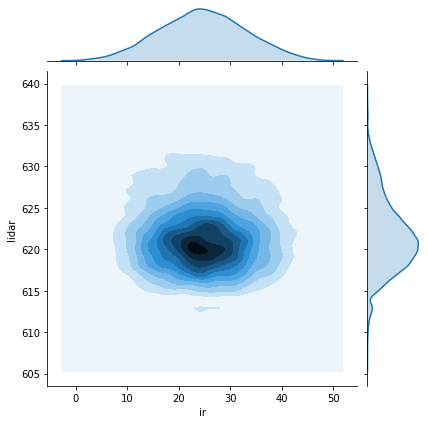

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#
data = pd.read_csv("sensor_data_600.txt",delimiter = " ",
                   header = None,names = ("date","time","ir","lidar"))
d = data[(data["time"] < 160000) & (data["time"] >= 120000)]
d = d.loc[:,["ir","lidar"]]

sns.jointplot(d["ir"],d["lidar"],d,kind = "kde")
plt.show()
                                    

In [6]:
print(d.ir.var())
print(d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()

a = diff_ir * diff_lidar
print(sum(a) / (len(d) - 1))

d.mean()

67.8996536049551
18.152233089872176
-0.40128618261821286


ir        24.649454
lidar    621.689539
dtype: float64

In [7]:
d.cov()

,ir,lidar
ir,67.899654,-0.401286
lidar,-0.401286,18.152233


In [8]:
from scipy.stats import multivariate_normal

irlidar = multivariate_normal(mean = d.mean().values.T,cov = d.cov().values)

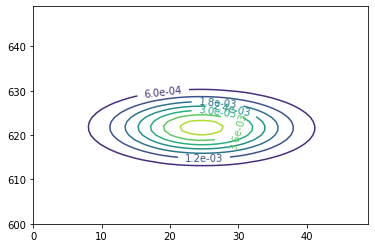

In [12]:
import numpy as np
x,y = np.mgrid[0:50,600:650]
pos = np.empty(x.shape + (2,))
pos[:,:,0] = x
pos[:,:,1] = y

cont = plt.contour(x,y,irlidar.pdf(pos))
cont.clabel(fmt = '%1.1e')
plt.show()

In [14]:
print("x:",x)
print("y:",y)

x: [[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [47 47 47 ... 47 47 47]
 [48 48 48 ... 48 48 48]
 [49 49 49 ... 49 49 49]]
y: [[600 601 602 ... 647 648 649]
 [600 601 602 ... 647 648 649]
 [600 601 602 ... 647 648 649]
 ...
 [600 601 602 ... 647 648 649]
 [600 601 602 ... 647 648 649]
 [600 601 602 ... 647 648 649]]


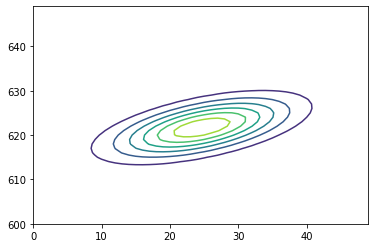

In [17]:
c = d.cov().values + np.array([[0,20],[20,0]])
tmp = multivariate_normal(mean = d.mean().values.T,cov = c)
cont = plt.contour(x,y,tmp.pdf(pos))
plt.show()